In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import my_module as my
import seaborn as sns
from datetime import *

#### Lecture des données

In [2]:

geo = pd.read_csv('olist_geolocation_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
category = pd.read_csv('product_category_name_translation.csv')

# 1. Analyse exploratoire  
Dans cette partie, nous allons parcourir les datasets, un par un, et analyser leurs données afin de mieux les comprendre.    

**Méthodologie :**  
    Nous allons nettoyer les données qui peuvent principalement servir le but de ce projet et qui est la segmentation des clients. En plus, nous allons créer de nouvelles variables si nécessaire (feature engineering). Pour chaque dataset, nous allons mentionner une section qu'on nommera 'sélection des variables utiles" où on va garder juste les variables que nous estimons utiles pour le merge avec les autres datasets et aussi pour l'analyse des comportements du client.  

## 1.1. Geolocalisation  
Ce jeu de données contient des informations sur les codes postaux brésiliens et leurs coordonnées latitude/longitude. Utile pour tracer des cartes et trouver des distances entre les vendeurs et les clients.  


In [3]:
#aperçu des données
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
#description des données
geo.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [5]:
my.variable_survey(geo)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,geolocation_zip_code_prefix,int64,19015,0.0 %
1,geolocation_lat,float64,717360,0.0 %
2,geolocation_lng,float64,717613,0.0 %
3,geolocation_city,object,8011,0.0 %
4,geolocation_state,object,27,0.0 %


In [6]:
geo_dict = {'geo': geo}
my.dataframe_survey(geo_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,geo,"(1000163,5)",0,0.0 %,261831,0.2617883285024541 %


### Remarque:  
Nous remarquons qu'il y a des doublons dans ce dataset. Nous allons les supprimer

In [7]:
geo = geo.drop_duplicates()

In [8]:
geo.shape

(738332, 5)

In [9]:
geo_dict = {'geo': geo}
my.dataframe_survey(geo_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,geo,"(738332,5)",0,0.0 %,0,0.0 %


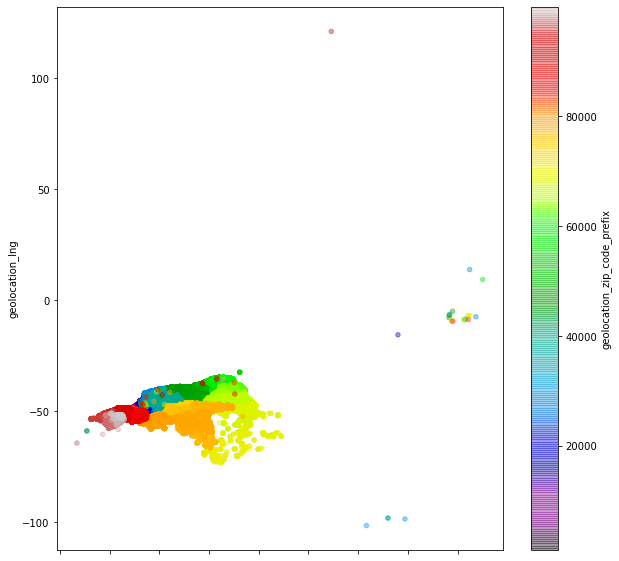

In [10]:
geo.plot(kind="scatter", x="geolocation_lat", y="geolocation_lng",
         alpha=0.4, c="geolocation_zip_code_prefix",
         cmap='nipy_spectral', colorbar=True, figsize=(10, 10))
plt.show()

### Remarque:  
Nous remarquons d'après la représentation géographique des zip-codes la présence des valeurs aberrantes. Nous allons les supprimer. 

In [11]:
geo = geo[geo['geolocation_lat'].between(-35 , 5)]
geo = geo[geo['geolocation_lng'].between(-75 , -33)]

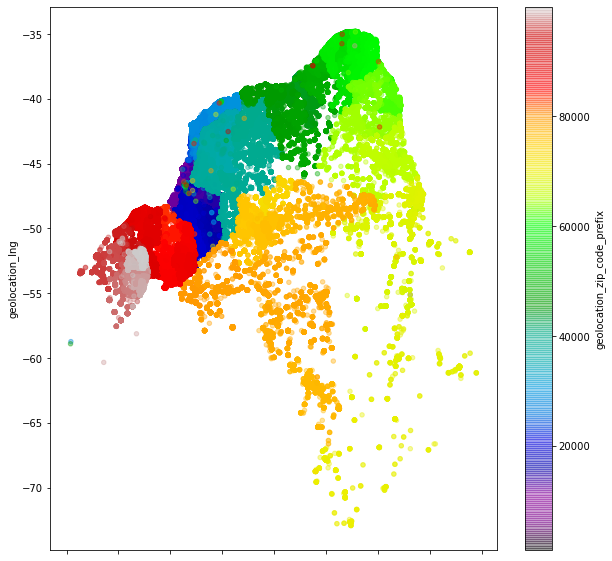

In [12]:
geo.plot(kind="scatter", x="geolocation_lat", y="geolocation_lng",
         alpha=0.4, c="geolocation_zip_code_prefix",
         cmap='nipy_spectral', colorbar=True, figsize=(10, 10))
plt.show()

## **Sélection des variables utiles**  
Je pense qu'il n'y a pas de données utiles par rapport à l'objectif du projet puisque le dataframe "geo" décrit principalement les codes postaux brasiliens. Nous décidons donc de ne pas sélectionner ce dataframe pour la suite et donc nous allons pas poursuivre le nettoyage de ses données. 

## 1.2. Orders / Les commandes  


In [13]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
#description des données
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,91de6d82a66a52cbc3286556438b4705,d26479e3d4ae4515761df4f01cc3cf5b,delivered,2018-06-01 13:39:44,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [15]:
orders_dict = {'orders' :orders}
my.dataframe_survey(orders_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,orders,"(99441,8)",4908,0.62 %,0,0.0 %


In [16]:
my.variable_survey(orders)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,order_id,object,99441,0.0 %
1,customer_id,object,99441,0.0 %
2,order_status,object,8,0.0 %
3,order_purchase_timestamp,object,98875,0.0 %
4,order_approved_at,object,90733,0.16 %
5,order_delivered_carrier_date,object,81018,1.79 %
6,order_delivered_customer_date,object,95664,2.98 %
7,order_estimated_delivery_date,object,459,0.0 %


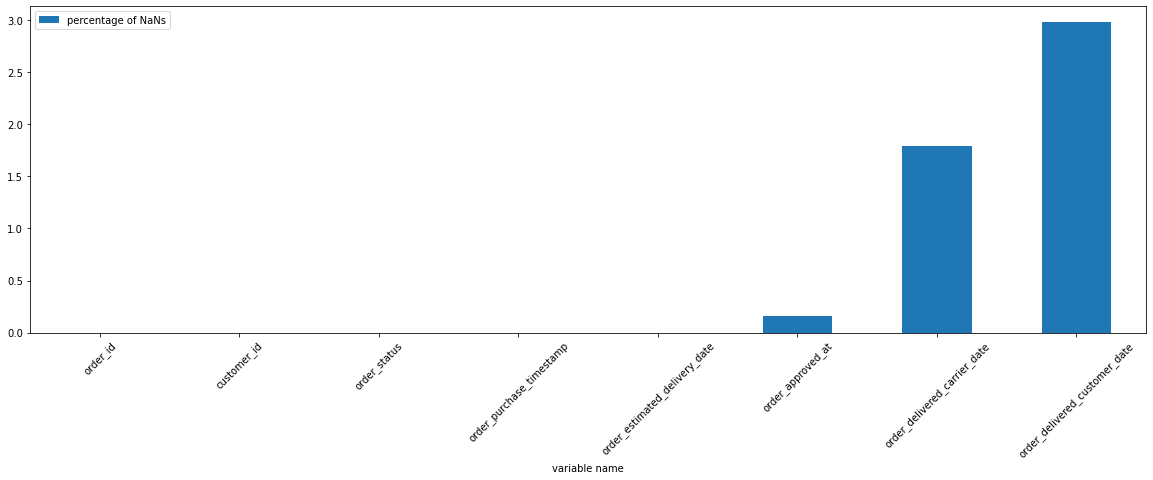

In [17]:
my.nans_df(orders)

Nous allons essayer de comprendre les données manquantes :  
- Dans ce dataset, il y a toute information qui concerne la commande.
- Il y a plusieurs données sur les dates:  
   - order_purchase_timestamp: horodatage de l'achat de la commande
   - order_estimated_delivery_date : date estimé pour la livraison
   - order_approved_at : indique quand la commande est approuvée. Puisqu'il y a des données manquantes, nous mettons comme hypothèse que la commande est approuvée après peux de temps de la date d'achat. Si cette hypothèse est vérifiée, nous allons remplacer les valeurs manquantes par la order_purchase_timestamp.  
   - order_delivered_carrier_date: date de livraison de la commande au partenaire logistique
   - order_delivered_customer_date: date actuelle de livraison au client  
   
Ce qui nous interesse dans ces données, afin d'extraire le RFM, c'est orderID, custumerID, order_purchase_timestamp. 

In [18]:
#conversion des données date de object vers datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [19]:
#vérifions les différents status des commandes
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [20]:
orders['order_status'].value_counts(normalize=True)

delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: order_status, dtype: float64

<AxesSubplot:ylabel='order_status'>

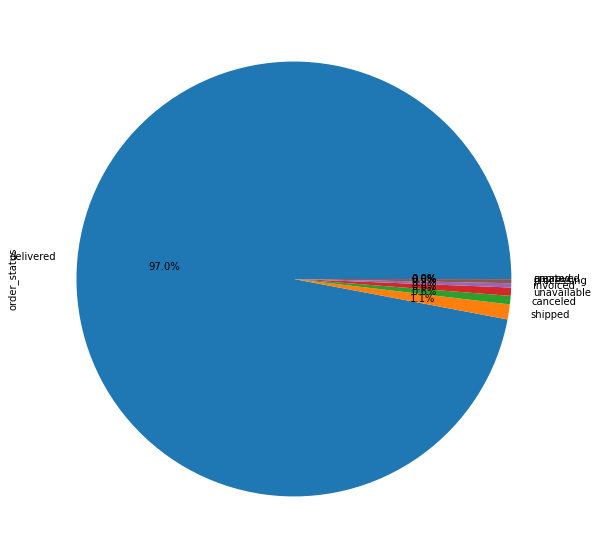

In [21]:
plt.figure(figsize=(12,10))
orders['order_status'].value_counts(normalize=True).plot.pie(autopct="%1.1f%%")

In [22]:
#Nous allons supprimer les commandes annulées
orders = orders[orders.order_status != 'canceled'] 

In [23]:
#verifier qu'on a bien supprimé les commandes annulées
orders['order_status'].value_counts(normalize=True)

delivered      0.976340
shipped        0.011203
unavailable    0.006163
invoiced       0.003178
processing     0.003046
created        0.000051
approved       0.000020
Name: order_status, dtype: float64

## **Sélection des variables utiles**    
Pour ce dataframe, nous allons garder les variables orderID, custumerID, order_purchase_timestamp. Nous allons renommer la variable 'order_purchase_timestamp' afin de simplifier son appel. 

In [24]:
orders_df = orders[['order_id','customer_id', 'order_purchase_timestamp']]
orders_df.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp'], dtype='object')

In [25]:
#renommer 'order_purchase_timestamp'
orders_df = orders_df.rename(columns={"order_purchase_timestamp": "order_date"})

## 1.3. products/ produits

In [26]:
product_dict = {'products': products}
my.dataframe_survey(product_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,products,"(32951,9)",2448,0.83 %,0,0.0 %


--> Nous avons 32951 produits uniques

In [27]:
my.variable_survey(products)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,product_id,object,32951,0.0 %
1,product_category_name,object,73,1.85 %
2,product_name_lenght,float64,66,1.85 %
3,product_description_lenght,float64,2960,1.85 %
4,product_photos_qty,float64,19,1.85 %
5,product_weight_g,float64,2204,0.01 %
6,product_length_cm,float64,99,0.01 %
7,product_height_cm,float64,102,0.01 %
8,product_width_cm,float64,95,0.01 %


In [28]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


La table olist_products_dataset contient les variables suivantes :

    product_id: identifiant du produit
    product_category_name: nom du categorie du produit
    product_name_lenght: nombre de carectères du nom du produit
    product_description_lenght: nombre de carectères dans la description du produit
    product_photos_qty: nombre de photos publiées décrivant le produit
    product_weight_g: le poids du produit en gramme
    product_length_cm: longueur du produit en cm
    product_height_cm: hauteur du produit en cm
    product_width_cm: largeur du produit en cm.

In [29]:
#Nombre de produits uniques
print("Le nombre de catégories est : {}".format(products["product_category_name"].nunique()))

Le nombre de catégories est : 73


In [30]:
products["product_category_name"].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

Nous remarquons que le nom des catégories est en portugais. Nous allons voir si dans les autres dataframes il est mentionné ces nom en anglais ou en français. Ceci sera interessant afin de mieux les comprendre et créer des superclasses.  

## **Sélection des variables utiles**     

Pour le moment, nous allons garder, pour ce dataframe, les variables: product_id et product_category_name

In [31]:
products_df = products[['product_id','product_category_name']]

## 1.4. Sellers/ les vendeurs

In [32]:
sellers_dict = {'sellers':sellers}
my.dataframe_survey(sellers_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,sellers,"(3095,4)",0,0.0 %,0,0.0 %


--> Nous avons 3095 vendeurs uniques

In [33]:
my.variable_survey(sellers)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,seller_id,object,3095,0.0 %
1,seller_zip_code_prefix,int64,2246,0.0 %
2,seller_city,object,611,0.0 %
3,seller_state,object,23,0.0 %


In [34]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



La table olist_sellers_dataset contient les variables suivantes :

    seller_id: identifiant unique du vendeur
    seller_zip_code_prefix: code postal du vendeur
    seller_city: nom du cité du vendeur
    seller_state: statut du vendeur



In [35]:
sellers['seller_state'].nunique()

23

In [36]:
sellers['seller_city'].nunique()

611

### Remarques:  

- On a 611 vendeurs ayant 23 status différents.
- Après avoir classifier les cités selon l'ordre décroissant de leur fréquence, nous allons afficher les 15 premiers cités où les vendeurs sont citués. Pour ce faire, nous allons automatiser l'affichage des barplots présentant le pourcentage de fréquance de chaque variable.

In [37]:
# fonction qui affiche (en tableau et barplots) le pourcentage de fréquence de chaque\
# valeur d'une variable qualitative

def barplots_var_frequency(data, variable):
    count = pd.DataFrame(data[variable].value_counts())
    count['Pourcentage'] = count.apply(lambda row: round(row*100/sum(count[variable]),2))
    
    NA = data[variable].isna().sum()
    pourc_na=round(NA/data.shape[0],2)*100
    df = pd.DataFrame([NA, pourc_na]).T
    df.rename(columns={0:variable, 1:'Pourcentage'}, index={0:'NaN'}, inplace=True)
    
    count = pd.concat([count, df])
    count = count.iloc[:15]
    
    #afficher un barplots des pourcentages
    plt.figure(figsize=(6, 4))
    sns.barplot(x="Pourcentage", y=count.index, data=count, color="b")
    plt.ylabel(variable)
    plt.xlabel("Pourcentage")
    return count

,seller_city,Pourcentage
sao paulo,694.0,22.42
curitiba,127.0,4.10
rio de janeiro,96.0,3.10
belo horizonte,68.0,2.20
ribeirao preto,52.0,1.68
guarulhos,50.0,1.62
ibitinga,49.0,1.58
santo andre,45.0,1.45
campinas,41.0,1.32
maringa,40.0,1.29


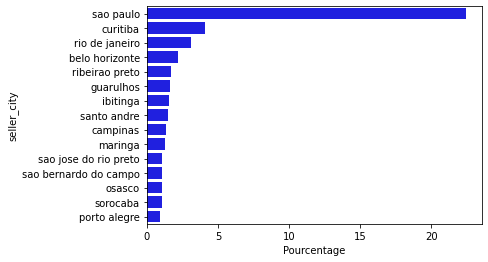

In [38]:
#les cités des vendeurs en pourcentage
barplots_var_frequency(sellers, 'seller_city')

--> Nous remarquons que la majorité des vendeurs sont à Sao Paulo (22,4%)

Text(0.5, 1.0, 'Classement des 15 produits les plus fréquents')

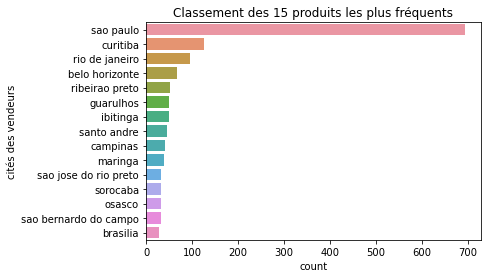

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(y="seller_city", data=sellers, order=sellers.value_counts(sellers['seller_city'], normalize=True).iloc[:15].index)
plt.ylabel("cités des vendeurs")
plt.title("Classement des 15 produits les plus fréquents")

In [40]:
sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

## **Sélection des variables utiles**     

Pour notre projet, nous allons garder les variables : "seller_id", 'seller_zip_code_prefix', 'seller_city'. Nous pensons que ces informations sur le vendeur peuvent être utile pour savoir si le vendeur et l'acheteur son de la même cité. Ceci pourra être utile pour savoir si un acheteur préfère acheter des produits locaux ou non. 

In [61]:
sellers_df = sellers[[ 'seller_id', 'seller_zip_code_prefix', 'seller_city']]

## 1.5. Reviews/ les commentaires  



Le dataframe "reviews" contient les variables suivantes :

    review_id: identifiant du commentaire
    order_id: identifiant de la commande
    review_score: score de satisfaction donnée par le client par rapport à la commande
    review_comment_title: titre du commentaire donné par le client
    review_comment_message: commentaire laissé par le client. 
    review_creation_date: la date à laquelle l'enquête de satisfaction a été envoyée au client.
    review_answer_timestamp: Affiche l'horodatage des réponses à l'enquête de satisfaction.



In [41]:
review_dict = {'reviews' : reviews}
my.dataframe_survey(review_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,reviews,"(99224,7)",145903,21.01 %,0,0.0 %


In [42]:
my.variable_survey(reviews)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,review_id,object,98410,0.0 %
1,order_id,object,98673,0.0 %
2,review_score,int64,5,0.0 %
3,review_comment_title,object,4527,88.34 %
4,review_comment_message,object,36159,58.7 %
5,review_creation_date,object,636,0.0 %
6,review_answer_timestamp,object,98248,0.0 %


In [43]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


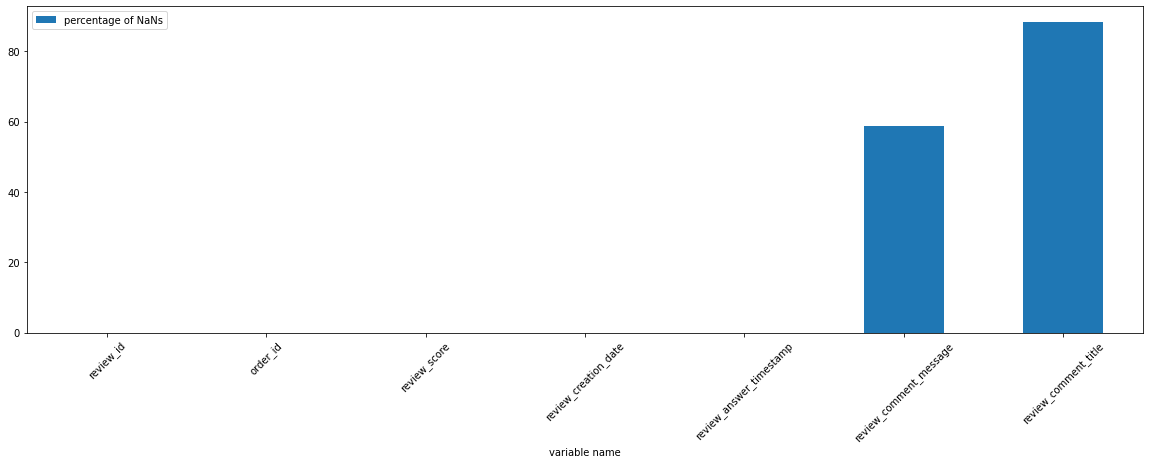

In [44]:
my.nans_df(reviews)

/home/soumaya/anaconda3/envs/openclassrooms/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review_score', ylabel='Density'>

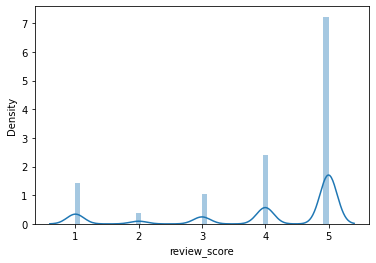

In [45]:
sns.distplot(reviews['review_score'])

### Remarques:  
- Les données dans la variables "review_comment_title" sont presque tous manquantes (presque 90% de Nans)  
- Le client évalue sa commande passé par un commentaire et un score. Les scores sont entre 1 et 5. Le score le plus attribué dans ces données est 5. 

In [46]:
reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

## Sélection des variables utiles:  
Pour notre projet, je pense que savoir si un client est satisfait ou non, ou bien avoir une idée sur son niveau de satisfaction n'est pas très utile pour la segmentation RFM des clients. Mai peut etre qu'on en aura besoin pour tester d'autres approches. Je vais donc garder les variables 'review_id', 'order_id', 'review_score'. 

In [47]:
reviews_df = reviews[['review_id', 'order_id', 'review_score']]
reviews_df.columns

Index(['review_id', 'order_id', 'review_score'], dtype='object')

## 1.6. Items   



Le dataframe "items" contient les variables suivantes :

    - order_id: identifiant de la commande
    - order_item_id: numéro séquentiel identifiant le nombre d'articles inclus dans le même ordre.
    - product_id: identifiant du produit
    - seller_id: identifiant du vendeur
    - shipping_limit_date: la date limite dans laquelle le vendeur expédie la commande au partenaire logistique.
    - price: le prix de l'article
    - freight_value: frais de transport des articles (si une commande a plus d'un article, le frais de transport est répartie entre les articles)



In [48]:
items_dict = {'items': items}
my.dataframe_survey(items_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,items,"(112650,7)",0,0.0 %,0,0.0 %


Dans ce dataframe, il n'y a ni des doublons ni des valeurs manquantes.

In [49]:
my.variable_survey(items)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,order_id,object,98666,0.0 %
1,order_item_id,int64,21,0.0 %
2,product_id,object,32951,0.0 %
3,seller_id,object,3095,0.0 %
4,shipping_limit_date,object,93318,0.0 %
5,price,float64,5968,0.0 %
6,freight_value,float64,6999,0.0 %


In [50]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [51]:
items['order_id'].nunique()

98666

In [52]:
sum(items.duplicated('order_id'))

13984

--> Dans ce dataframe, il y on a 98666 commandes avec un seul article et 13984 avec plus qu'un article. 

,order_item_id,Pourcentage
1,98666.0,87.59
2,9803.0,8.70
3,2287.0,2.03
4,965.0,0.86
5,460.0,0.41
6,256.0,0.23
7,58.0,0.05
8,36.0,0.03
9,28.0,0.02
10,25.0,0.02


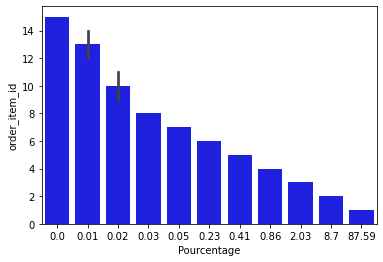

In [53]:
#verifions la fréquence des commandes par rapport aux nombre d'articles commandés
barplots_var_frequency(items, 'order_item_id')

In [54]:
items['order_item_id'].describe()

count    112650.000000
mean          1.197834
std           0.705124
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: order_item_id, dtype: float64

--> Nous remarquons que 87,59% des commandes contiennent 1 seul article. Le nombre maximal d'articles dans une commande est 21. 

In [55]:
#nous allons modifier le type de "shipping_limit_date" / date maximale d'expédition en date
items['shipping_limit_date']= pd.to_datetime(items['shipping_limit_date'])

<AxesSubplot:xlabel='price', ylabel='Density'>

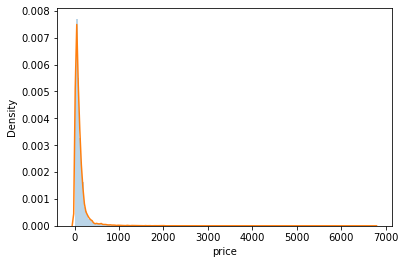

In [56]:
#verifions maintenant la variation des prix des commandes
plt.hist(items['price'], alpha=0.3,  bins=200, density=True)
sns.kdeplot(items['price'])

(0.0, 1000.0)

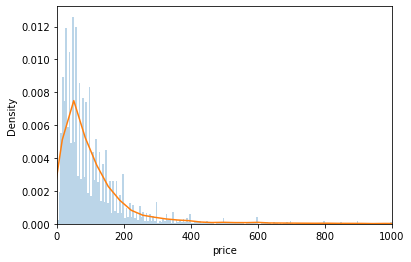

In [57]:
#nous faisons un zoom sur l'intervalle des prix [0, 1000]
plt.hist(items['price'], alpha=0.3, range=(0, 1000),  bins=200, density=True)
sns.kdeplot(items['price'])
plt.xlim(0, 1000)

--> Nous remarquons que la grande majorité des commandes valent 100 réaux. 

In [58]:
items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

## Sélection des variables utiles  

Pour notre projet, nous allons sélectionner les variables ['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price'] 

In [59]:
items_df=items[['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price']]

In [60]:
items_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price'],
      dtype='object')

## 1.7. Customers / Client   


La table customers contient les variables suivantes :

    customer_id: identifiant de la commande. Chaque commande a un custumer_id. 
    customer_unique_id: identifiant du client.
    customer_zip_code_prefix: zip code du client
    customer_city: nom du cité de l'acheteur
    customer_state: état du client


In [64]:
customers_dict ={'customers': customers}
my.dataframe_survey(customers_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,customers,"(99441,5)",0,0.0 %,0,0.0 %


Nous remarquons qu'il n'y a pas ni doublons ni valeurs manquantes dans ce dataframe.

In [65]:
my.variable_survey(customers)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,customer_id,object,99441,0.0 %
1,customer_unique_id,object,96096,0.0 %
2,customer_zip_code_prefix,int64,14994,0.0 %
3,customer_city,object,4119,0.0 %
4,customer_state,object,27,0.0 %


In [66]:
# Nombre de villes
nbre_city = customers["customer_city"].nunique()
# Nombre d'Etats
nbre_states = customers["customer_state"].nunique()
# Nombre de consommateurs
nbre_customers = customers["customer_unique_id"].nunique()

print("Le nombre de villes est : {}".format(nbre_city))
print("Le nombre d'états est : {}".format(nbre_states))
print("Le nombre de clients est : {}".format(nbre_customers))



Le nombre de villes est : 4119
Le nombre d'états est : 27
Le nombre de clients est : 96096


,customer_city,Pourcentage
sao paulo,15540.0,15.63
rio de janeiro,6882.0,6.92
belo horizonte,2773.0,2.79
brasilia,2131.0,2.14
curitiba,1521.0,1.53
campinas,1444.0,1.45
porto alegre,1379.0,1.39
salvador,1245.0,1.25
guarulhos,1189.0,1.20
sao bernardo do campo,938.0,0.94


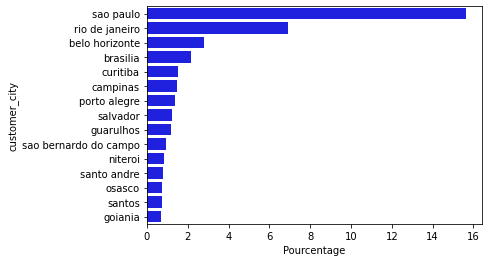

In [68]:
#vérifions la distribution des clients par villes
barplots_var_frequency(customers, 'customer_city')

--> on remarque que la majorité des clients (15,63 %) habitent à Sao Paulo. 

,customer_state,Pourcentage
SP,41746.0,41.98
RJ,12852.0,12.92
MG,11635.0,11.70
RS,5466.0,5.50
PR,5045.0,5.07
SC,3637.0,3.66
BA,3380.0,3.40
DF,2140.0,2.15
ES,2033.0,2.04
GO,2020.0,2.03


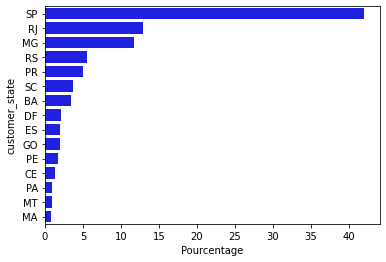

In [69]:
barplots_var_frequency(customers, 'customer_state')

--> On remarque que 41.98 % des états présents dans le dataframe sont SP.   
### Sélection des variables utiles  

Pour ce projet, je vais garder toutes les variables.


## 1.8. Payments /Payement